In [22]:
import json
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

In [51]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


In [52]:
def parse_data(file):
    for l in open(file,'r'):
        yield json.loads(l)

data = list(parse_data('Sarcasm_Headlines_Dataset.json'))

sentences = []
labels = []
urls = []

for item in data:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [53]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [54]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [55]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [56]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 2s - 2ms/step - accuracy: 0.5601 - loss: 0.6821 - val_accuracy: 0.5680 - val_loss: 0.6689
Epoch 2/30
625/625 - 1s - 1ms/step - accuracy: 0.7109 - loss: 0.5690 - val_accuracy: 0.7541 - val_loss: 0.4953
Epoch 3/30
625/625 - 1s - 1ms/step - accuracy: 0.8186 - loss: 0.4145 - val_accuracy: 0.8140 - val_loss: 0.4154
Epoch 4/30
625/625 - 1s - 1ms/step - accuracy: 0.8513 - loss: 0.3545 - val_accuracy: 0.8322 - val_loss: 0.3852
Epoch 5/30
625/625 - 1s - 1ms/step - accuracy: 0.8666 - loss: 0.3192 - val_accuracy: 0.8466 - val_loss: 0.3628
Epoch 6/30
625/625 - 1s - 1ms/step - accuracy: 0.8741 - loss: 0.2962 - val_accuracy: 0.8460 - val_loss: 0.3588
Epoch 7/30
625/625 - 1s - 1ms/step - accuracy: 0.8903 - loss: 0.2742 - val_accuracy: 0.7578 - val_loss: 0.5293
Epoch 8/30
625/625 - 1s - 1ms/step - accuracy: 0.8995 - loss: 0.2522 - val_accuracy: 0.8562 - val_loss: 0.3441
Epoch 9/30
625/625 - 1s - 1ms/step - accuracy: 0.9071 - loss: 0.2325 - val_accuracy: 0.8402 - val_loss: 0.3668
E

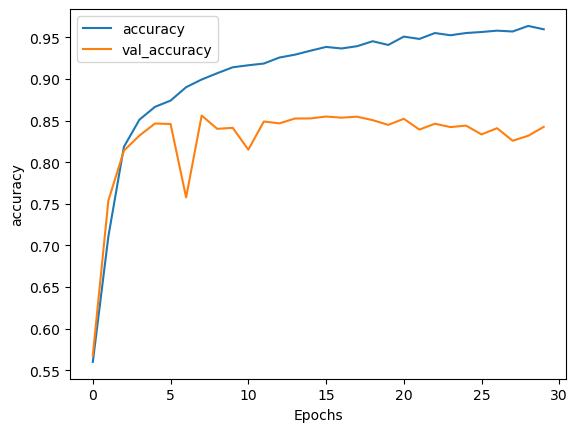

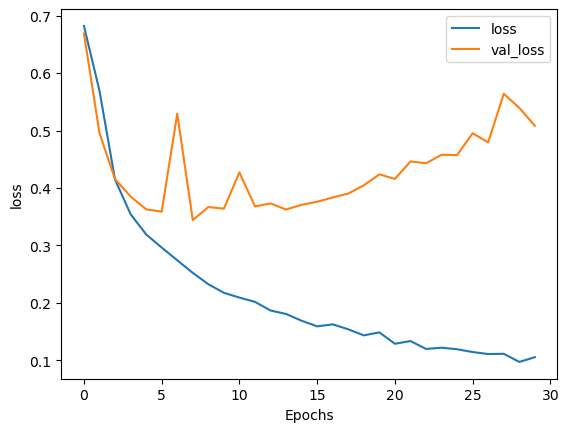

In [57]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')
             
# loss function quantifies the difference between the predicted and the actual values.

In [62]:
sentence = ['granny starting to fear spiders in the garden might be real',
                'the weather today is bright and sunny']

sequences = tokenizer.texts_to_sequences(sentence)
padded_sequence = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type, padding=padding_type)
print(model.predict(padded_sequence))

# First sentence is 0.77 very close to 1 indicating the high probability of sarcasm
# Second has 9.5 * 10 -5 no chance

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[[7.785117e-01]
 [9.503780e-05]]


In [63]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [64]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [ ]:
print(weights[0])

[ 0.11067277 -0.2436583  -0.17636836  0.08530482 -0.04203337  0.788304
 -0.2916314  -0.08402196 -0.05524801  0.03463382  0.18652707  0.06959236
 -0.44735774 -0.15254354 -0.04636696 -0.06982238]
